# Breach detection aka geofencing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np

In [2]:
with open('./proc_merged_utm.geojson') as f:
  data = json.load(f)

polys = []
  
for feature in data["features"]:
        if feature["geometry"]["type"] == "Polygon":
	#subtracting offsets here, the offsets are in the geojson file
            featCoor = [[i[0]-data["offset"][0],i[1]-data["offset"][1]] for i in feature["geometry"]["coordinates"][0]]
            print(featCoor)
            polys.append(np.array(featCoor))
  


[[3217.1285352958366, -595.248560841661], [3264.493599002715, -516.6547455894761], [3368.987753573223, -170.79830981744453], [3339.7610479306895, -150.03553265938535], [3539.556546382024, 388.3281959570013], [3672.191914448049, 724.2102366699837], [3740.438708892674, 897.064253013581], [3759.8689565721434, 933.9794702338986], [3783.7729572473327, 945.9240079447627], [3811.5579096936854, 951.3182532261126], [3848.3772139728535, 938.6799971344881], [3854.645129468525, 931.7476024441421], [3852.637829765212, 919.456319521647], [3875.459952692734, 909.7329797409475], [3890.2701770134736, 891.4050701116212], [3912.5596220630687, 884.717971728649], [3992.1714335479774, 926.1760876532644], [3990.174511821475, 948.768295569811], [4002.160282551544, 955.1808167817071], [4014.87799009867, 958.7975224531256], [4025.114643127308, 953.1722820042633], [4048.4169842090923, 934.9232149729505], [4058.7593281224836, 925.7578752106056], [4097.656304140692, 979.8053251742385], [4127.04550688481, 1027.5503

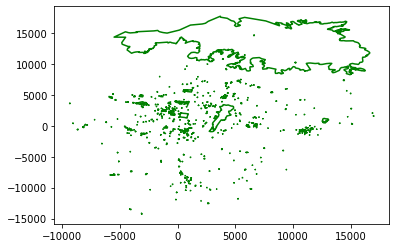

In [4]:
for poly in polys:
  plt.plot(poly[:, 0], poly[:, 1], 'g')

plt.show()

In [5]:
from shapely.geometry import Point, Polygon, LineString, MultiPoint

In [6]:
def ray_casting_check(point_coord, polys):
  point = Point(point_coord)
  for poly in polys:
    polygon = Polygon(poly)
    if polygon.contains(point):
      return True
  
  return False

In [8]:
# %%timeit
ray_casting_check([10000, 11000], polys)

True

In [9]:
from shapely.ops import triangulate
import triangle as tr

In [10]:
# %%timeit
poly1 = Polygon(polys[0])
delaunay = triangulate(poly1)
clipped_delaunay = [triangle for triangle in triangulate(poly1) if triangle.within(poly1)]

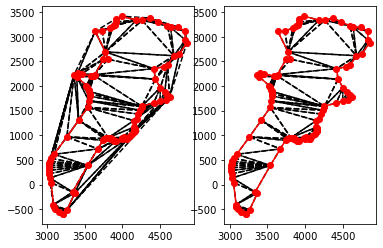

In [14]:
plt.subplot(1, 2, 1)

for poly in delaunay:
   plt.plot(*poly.exterior.xy, 'k--')

plt.plot(*poly1.exterior.xy, 'ro-')

plt.subplot(1, 2, 2)

for poly in clipped_delaunay:
   plt.plot(*poly.exterior.xy, 'k--')

plt.plot(*poly1.exterior.xy, 'ro-')
  
plt.show()

In [1]:
# %%timeit
vertices = []
segments = []
v = len(poly1.exterior.coords)

for i, coords in enumerate(list(poly1.exterior.coords)):
  vertices.append(coords)
  segments.append([i, (i+1)%v])
  
poly = dict(vertices=np.array(vertices), segments=np.array(segments))
t = tr.triangulate(poly, 'p')

tr.compare(plt, poly, t)
plt.show()

NameError: name 'poly1' is not defined